In [14]:
import torch
import matplotlib.pyplot as plt
import pathlib

import utils
import argparse

In [15]:
args = argparse.Namespace(accum_steps=1, batch_size=32, checkpoint='segcontrast_05', data_dir='./Datasets/SemanticKITTI', dataset_name='SemanticKITTI', decay_lr=0.0001, device_id=0, epochs=200, feature_size=128, load_checkpoint=False, log_dir='checkpoint/contrastive', lr=0.5, num_points=20000, num_workers=8, segment_contrast=True, shuffle=False, sparse_model='MinkUNet', sparse_resolution=0.05, tau=0.1, use_cuda=True, use_intensity=True, vicreg=True, vicreg_alpha=0.75, vicreg_cov_coeff=1, vicreg_eps=0.0001, vicreg_gamma=1, vicreg_inv_coeff=25, vicreg_num_global=20, vicreg_num_local=4, vicreg_var_coeff=25)
vicreg = utils.get_moco_model(args, torch.cuda.FloatTensor)

In [27]:
base_path = 'checkpoint/contrastive/epoch{0}_model_head_segcontrast.pt'
base_path = 'checkpoint/contrastive/epoch{0}_model_segcontrast.pt'
paths = []
for i in range(0, 40, 10):
    paths.append(base_path.format(i))

models = []
for p in paths:
    models.append(torch.load(p))
    

In [63]:
m = models[0]
keys = [k for k in m['model'].keys() if 'batches' not in k and 'running' not in k]

In [73]:
deltas = []

for i in range(1, len(models)):
    before = models[i - 1]['model']
    after = models[i]['model']

    d = {}
    for k in keys:
        b = before[k]
        a = after[k]
        delta = (b - a)
        d[k] = torch.std(delta)
    deltas.append(d)
print(keys)

['stem.0.kernel', 'stem.1.bn.weight', 'stem.1.bn.bias', 'stem.3.kernel', 'stem.4.bn.weight', 'stem.4.bn.bias', 'stage1.0.net.0.kernel', 'stage1.0.net.1.bn.weight', 'stage1.0.net.1.bn.bias', 'stage1.1.net.0.kernel', 'stage1.1.net.1.bn.weight', 'stage1.1.net.1.bn.bias', 'stage1.1.net.3.kernel', 'stage1.1.net.4.bn.weight', 'stage1.1.net.4.bn.bias', 'stage1.2.net.0.kernel', 'stage1.2.net.1.bn.weight', 'stage1.2.net.1.bn.bias', 'stage1.2.net.3.kernel', 'stage1.2.net.4.bn.weight', 'stage1.2.net.4.bn.bias', 'stage2.0.net.0.kernel', 'stage2.0.net.1.bn.weight', 'stage2.0.net.1.bn.bias', 'stage2.1.net.0.kernel', 'stage2.1.net.1.bn.weight', 'stage2.1.net.1.bn.bias', 'stage2.1.net.3.kernel', 'stage2.1.net.4.bn.weight', 'stage2.1.net.4.bn.bias', 'stage2.1.downsample.0.kernel', 'stage2.1.downsample.1.bn.weight', 'stage2.1.downsample.1.bn.bias', 'stage2.2.net.0.kernel', 'stage2.2.net.1.bn.weight', 'stage2.2.net.1.bn.bias', 'stage2.2.net.3.kernel', 'stage2.2.net.4.bn.weight', 'stage2.2.net.4.bn.bias',

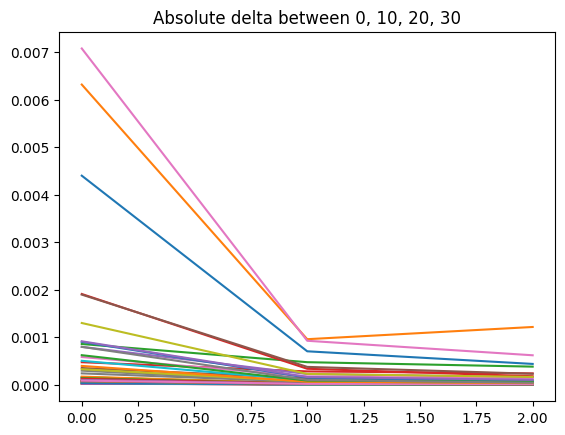

In [74]:
plt.title('Absolute delta between 0, 10, 20, 30')
for k in [k for k in keys if 'weight' in k]:
    d = [delta[k].item() for delta in deltas]
    plt.plot(d, label=k)
# plt.legend()
plt.show()